<a href="https://colab.research.google.com/github/DidiRamsaran/AI_ML_projects/blob/main/Perceptron_practice_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practice 3: Perceptron

Estudiante: D. Ramsaran Chin

Profesor: Dr. Pedro García


1. Cargue el conjunto de datos ”wine” de scikit-learn.

Estos datos son los resultados de un análisis químico de vinos cultivados en la misma
región de Italia por tres cultivadores diferentes. Se realizaron trece mediciones diferentes ("caracteristicas") de distintos componentes presentes en los tres tipos de vino.

2. Seleccione las caracteristicas: ”alcohol”, ”magnesium” y ”color intensity”.
>i. Seleccione entre los datos anteriores, dos tipos de vino que le permitan realizar una clasificación binaria.

3. Divida la data en dos subconjuntos: uno de entrenamiento y uno de prueba.
4. Usando los datos de entrenamiento, implemente un clasificador binario, basado en el algoritmo del Perceptrón Simple.
5. Usando los datos de prueba, evalue el desempeño del algoritmo y muestre el desempeño a través de una matriz de confusión.
6. Use un clasificador binario basado en el Perceptron de scikit-learn y compare su calidad,
con la obtenida anteriormente.
7. Grafique los datos, junto con el plano clasificador.
8. Elabore el reporte del proyecto, usando un notebook de Jupyter.

El reporte debe ser enviado por correo a la direcci on: pgarcial@ucab.edu.ve usando como encabezado del correo y nombre del archivo: IAAA_p3_Apellidos.ipynb.


In [ ]:
# Librerías a utilizar

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
#from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from collections import Counter
import math
import random


# opciones en columnas y filas
pd.set_option('display.max_columns', None) # Establece el valor de la opción especificada.
pd.set_option('display.max_rows', None)


#Paso 1. carga de datos

In [ ]:
# "wine" de skl
from sklearn.datasets import load_wine
wine = load_wine()

# se declara el df de wine
wine_df = pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

# info d ela data
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

#Paso 2. selección de características y tipos de vino

In [ ]:
# ahora se muestran los tipos de vinos presentes, así como sus frecuencias (n)

wine_df['target'].value_counts()

target
1.0    71
0.0    59
2.0    48
Name: count, dtype: int64

In [ ]:
# filtramos las características deseadas de los datos
wine_df_filt1 = pd.DataFrame(wine_df[["alcohol", "magnesium", "color_intensity", "target"]])

wine_filt_10 = wine_df_filt1[wine_df_filt1["target"].isin([1, 0])]
wine_filt_12 = wine_df_filt1[wine_df_filt1["target"].isin([1, 2])]


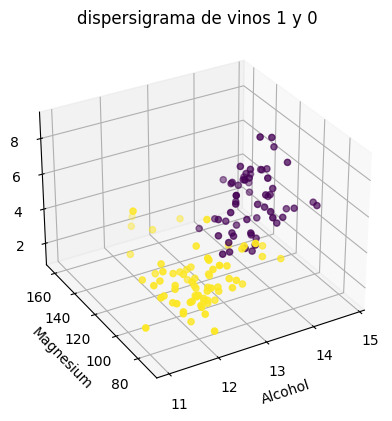

In [ ]:
# datos
alcohol = wine_filt_10["alcohol"]
magnesium = wine_filt_10["magnesium"]
color_intensity = wine_filt_10["color_intensity"]
target = wine_filt_10["target"]

# figura 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# dispersigrama
ax.scatter(alcohol, magnesium, color_intensity, c=target, cmap='viridis')

# ejes
ax.set_xlabel('Alcohol')
ax.set_ylabel('Magnesium')
ax.set_zlabel('Color Intensity')

# título
ax.set_title('dispersigrama de vinos 1 y 0')

# Rotación
ax.view_init(elev=30, azim=-120)  # Adjust elevation (elev) and azimuth (azim) as desired


plt.show()


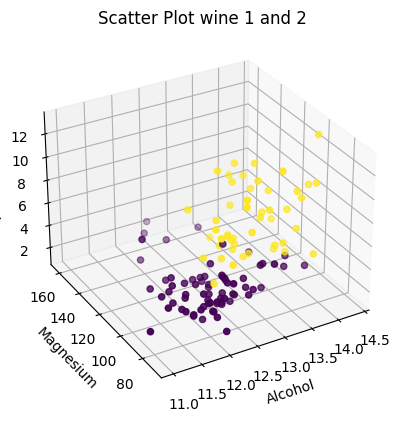

In [ ]:
# data
alcohol = wine_filt_12["alcohol"]
magnesium = wine_filt_12["magnesium"]
color_intensity = wine_filt_12["color_intensity"]
target = wine_filt_12["target"]



# fig 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# dispersigrama
ax.scatter(alcohol, magnesium, color_intensity, c=target, cmap='viridis')

# ejes
ax.set_xlabel('Alcohol')
ax.set_ylabel('Magnesium')
ax.set_zlabel('Color Intensity')

# título}
ax.set_title('Scatter Plot wine 1 and 2')

# Rotación
ax.view_init(elev=30, azim=-120)

plt.show()

#Paso 3. división en subconjuntos de entrenamiento y prueba

In [ ]:
# Previo a la división, se normaliza la data para generar medidas similares

alcohol = wine_filt_10["alcohol"]
magnesium = wine_filt_10["magnesium"]
color_intensity = wine_filt_10["color_intensity"]
target = wine_filt_10["target"]

# norm de alcohol
mean_alc = np.mean(alcohol)
SD_alc = np.std(alcohol)
norm_alc = (alcohol - mean_alc) / SD_alc

# norm de magnesium
mean_mag = np.mean(magnesium)
SD_mag = np.std(magnesium)
norm_mag = (magnesium - mean_mag) / SD_mag

# norm de intensidad del color
mean_coli = np.mean(color_intensity)
SD_coli = np.std(color_intensity)
norm_coli = (color_intensity - mean_coli) / SD_coli


In [ ]:
# Mediante el análisis gráfico, se aprecia menor superposición entre las posiciones de los vinos de las clases 1 y 0,
# por lo que se toman para el modelo de clasificiación binaria

# se asignan a los vectores los valores normalizados
alcohol = norm_alc
magnesium = norm_mag
color_intensity = norm_coli
target = wine_filt_10["target"]


# división en sets de entrenamiento y pruebaa
alcohol_train, alcohol_test, magnesium_train, magnesium_test, color_intensity_train, color_intensity_test, target_train, target_test = train_test_split(alcohol, magnesium, color_intensity, target, test_size=0.33, random_state=42, stratify=target)

#cálculo de proporciones originales en función de la etiqueta
class_counts = target.value_counts()
class_proportions = class_counts / len(target)
print("proporciones en df inicial")
print(class_proportions)

# proporciones en el df de entrenamiento
print("proporciones en df entrenamiento")
train_class_proportions = target_train.value_counts() / len(target_train)
print(train_class_proportions)

# proporciones en el df de prueba
print("proporciones en df prueba")
test_class_proportions = target_test.value_counts() / len(target_test)
print(test_class_proportions)


proporciones en df inicial
target
1.0    0.546154
0.0    0.453846
Name: count, dtype: float64
proporciones en df entrenamiento
target
1.0    0.551724
0.0    0.448276
Name: count, dtype: float64
proporciones en df prueba
target
1.0    0.534884
0.0    0.465116
Name: count, dtype: float64


#Paso 4. implementación del clasificadpr según algoritmo de perceptrón simple en la df de entrenamiento

In [ ]:
# Definimos los pesos
w = [random.uniform(-.5, .5) for _ in range(3)]
b = random.uniform(-.5, .5)
alpha = 0.0001

# Definimos las variables (data de entrenamiento)
x1 = alcohol_train
x2 = magnesium_train
x3 = color_intensity_train
x = np.array([x1, x2, x3]).T

y_tr = np.array(target_train)

# Bucle de entrenamiento
for epoch in range(1000):
    for row in range(x.shape[0]):
        # Predicción de y_hat para cada fila
        y_hat = np.dot(x[row], w) + b
        y_hat = np.where(y_hat > 0, 1, 0)

        # Actualización de pesos para cada fila
        e = y_hat - y_tr[row]
        w[0] = w[0] - alpha * e * x[row, 0]
        w[1] = w[1] - alpha * e * x[row, 1]
        w[2] = w[2] - alpha * e * x[row, 2]
        b = b - alpha * e

# Impresión de pesos y bias

print("pesos (w)")
print(w)

print("sesgo (b)")
print(b)

# Función para predecir y_hat en el conjunto de prueba
def predict(x):
    y = []
    for row in range(x.shape[0]):
        # Cálculo de y_hat para cada fila
        y_pred = np.dot(x[row], w) + b
        y_pred = np.where(y_pred > 0, 1, 0)

        # Adición de la predicción y_hat a la lista y
        y.append(y_pred)

    # Devolución de la matriz de predicciones y_hat
    return y
y = predict(x)
#print("predicciones de y")
#compa = pd.DataFrame({'y real':y_tr, 'y pred':y})
#print(compa)

pesos (w)
[-0.3619358422288832, -0.04759009184364978, -0.13786295186649908]
sesgo (b)
0.06810268406373667


#Paso 5. Prueba de calidad del modelo de entrenamiento con la data de prueba

In [ ]:
# data de prueba
x11 = alcohol_test
x22 = magnesium_test
x33 = color_intensity_test
xx = np.array([x11, x22, x33]).T

#predicción de clase
y_pred_test = np.array(predict(xx))
y_pred_test = y_pred_test.astype(float)

#compa_test = pd.DataFrame({'y real':target_test, 'y pred':y_pred_test})
#print(compa_test)

In [ ]:
# evaluamos con una matriz de confusión

cm = confusion_matrix(target_test, y_pred_test)
print(cm)

[[17  3]
 [ 4 19]]


#Paso 6. implementación del algoritmo con la librería scikit.learn

In [ ]:
# se llama alperceptrón y se entrena
clf = Perceptron(tol=1e-3, random_state=42)
clf.fit(x, y_tr)

# se guardan los pesos y sesgo
weights = clf.coef_[0]  # Access weights
bias = clf.intercept_[0]  # Access bias

print("Weights:", weights)
print("Bias:", bias)

# se realiza la predicción
y_skl = clf.predict(xx)

#compa_skl = pd.DataFrame({'y real':target_test, 'y pred':y_skl})
#print(compa_skl)

Weights: [-3.82693265  1.18782629 -1.56190906]
Bias: 2.0


In [ ]:
# matriz de confusión
cm_skl = confusion_matrix(target_test, y_skl)

# skl
print("matriz de confusión de implementación de skl")
print(cm_skl)

# propia
print("matriz de confusión de implementación propia")
print(cm)

matriz de confusión de implementación de skl
[[15  5]
 [ 3 20]]
matriz de confusión de implementación propia
[[17  3]
 [ 4 19]]


#Paso 7. graficación de data con plano clasificador

##Implementación propia

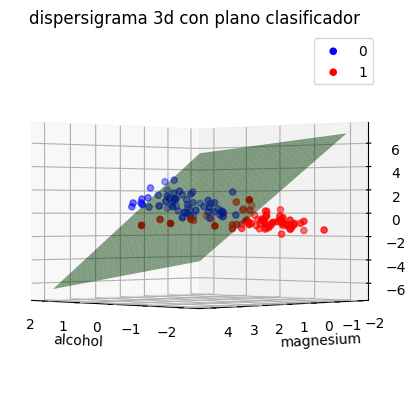

In [ ]:
# arrays de entrenamiento
x1 = np.array(alcohol_train)
x2 = np.array(magnesium_train)
x3 = np.array(color_intensity_train)

# arrays de prueba
x11 = np.array(alcohol_test)
x22 = np.array(magnesium_test)
x33 = np.array(color_intensity_test)

# se define un mesh grid
x1_surf, x2_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 100),
                                        np.linspace(x2.min(), x2.max(), 100))

# ecuación del plano
x3_surf = (-w[0] * x1_surf - w[1] * x2_surf - b) / w[2]


fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")

colors_train = ['blue' if value == 0 else 'red' for value in y_tr]
colors_test = ['blue' if value == 0 else 'red' for value in target_test]

ax.scatter3D(x1, x2, x3, label='0', color=colors_train)
ax.scatter3D(x11, x22, x33, label='1', color=colors_test)

ax.plot_surface(x1_surf, x2_surf, x3_surf, alpha=0.5, color='green')

# Add labels and title
ax.set_xlabel('alcohol')
ax.set_ylabel('magnesium')
ax.set_zlabel('color intensity')
ax.set_title('dispersigrama 3d con plano clasificador')
plt.legend()

ax.view_init(elev=0, azim=-225)  # Adjust elevation (elev) and azimuth (azim) as desired

plt.show()


##SKL

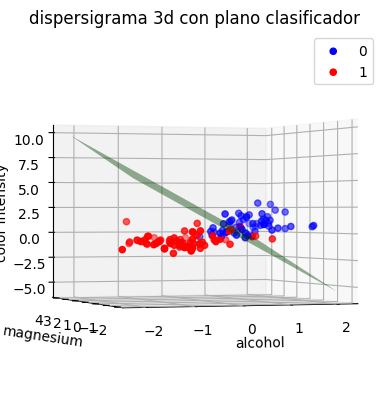

In [ ]:
# arrays de entrenamiento
x1 = np.array(alcohol_train)
x2 = np.array(magnesium_train)
x3 = np.array(color_intensity_train)

# arrays de prueba
x11 = np.array(alcohol_test)
x22 = np.array(magnesium_test)
x33 = np.array(color_intensity_test)

# se define un mesh grid
x1_surf, x2_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 100),
                                        np.linspace(x2.min(), x2.max(), 100))

# ecuación del plano
x3_surf = (-weights[0] * x1_surf - weights[1] * x2_surf - bias) / weights[2]


fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")

colors_train = ['blue' if value == 0 else 'red' for value in y_tr]
colors_test = ['blue' if value == 0 else 'red' for value in target_test]

ax.scatter3D(x1, x2, x3, label='0', color=colors_train)
ax.scatter3D(x11, x22, x33, label='1', color=colors_test)

ax.plot_surface(x1_surf, x2_surf, x3_surf, alpha=0.5, color='green')

# Add labels and title
ax.set_xlabel('alcohol')
ax.set_ylabel('magnesium')
ax.set_zlabel('color intensity')
ax.set_title('dispersigrama 3d con plano clasificador')
plt.legend()

ax.view_init(elev=0, azim=-110)  # Adjust elevation (elev) and azimuth (azim) as desired

plt.show()

